# Video games online sales project
#### Research for the online store Ice

Online store Ice sells video games all over the world. The goal of the project is to identify patterns that determine whether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.


## Content plan

1. [Step1](#Step1) Opening the data file and studing the general information
2. [Step2](#Step2) Preparing the data
3. [Step3](#Step3) Analysing the data
4. [Step4](#Step4) Creating a user profile for each region
5. [Step5](#Step5) Testing statistical hypothesis 
6. [Overall conclusion](#oc)

### Step1

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are missing values in Year_of_release, and large number of missing values in Critic_score, User_score ans Rating. Year is float and User_score - an object

In [337]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [338]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [339]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


There are a lot of 0 values in sales columns. 

In [340]:
for i in data.columns:
    print(i, len(data[data[i] == 0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


In [341]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


User_score has a value tbd

Dataset is quite corrupted with missing values, weird 0 values in sales, tbd values in User_score. Column names need to be changed. 

### Step2 

Renaming the columns

In [342]:
new_columns=data.columns.str.lower()
data.columns = new_columns
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's take a look at missing values in Year column

In [343]:
data['year_of_release'].isnull().sum()

269

Missing values are around 1%. Since the same game may have different release years, and it is impossible to find out which year a particular game was released in on a particular platform, I will replace the missing data with zero, change the data type. I will not take these data into account in further analysis. 

In [344]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'].isnull().sum()

0

In [345]:
data['year_of_release'] = data['year_of_release'].astype(int)

There are a lot of zero values in the sales columns, and they are not missing values. Let's see how the zeros are distributed over the years and in different games.

In [346]:
data[data['na_sales'] == 0]['year_of_release'].value_counts()

2010    381
2011    380
2009    370
2008    350
2007    323
2006    288
2012    285
2015    284
2016    220
2013    216
2014    204
1995    135
1996     99
1998     93
1994     90
2005     89
2002     87
1997     84
2000     77
2004     76
2001     71
1999     68
2003     61
0        58
1993     45
1991     27
1992     21
1986      7
1985      5
1984      4
1989      3
1990      3
1988      3
1987      1
Name: year_of_release, dtype: int64

In [347]:
data[data['eu_sales'] == 0]['year_of_release'].value_counts()

2008    693
2009    633
2007    604
2010    546
2006    479
2011    400
2012    264
2015    221
2016    219
2005    198
2013    189
2014    182
1995    138
2002    113
0       103
1996    101
2004     93
1994     92
1998     91
1997     83
2000     79
2003     78
1999     72
2001     67
1993     46
1991     27
1992     22
1986      9
1987      6
1985      5
1988      4
1984      4
1990      4
1989      4
1983      1
Name: year_of_release, dtype: int64

In [348]:
data[data['jp_sales'] == 0]['year_of_release'].value_counts()

2009    1021
2008     952
2010     786
2005     769
2007     741
2011     699
2003     663
2002     648
2004     631
2006     600
2001     345
2015     277
2014     273
2012     271
2016     266
2013     230
1998     228
1999     221
0        213
2000     210
1997     151
1996     118
1995      56
1981      46
1982      36
1994      16
1983      11
1980       9
1992       7
1987       6
1993       3
1988       3
1989       3
1986       2
1985       2
1984       1
Name: year_of_release, dtype: int64

In [349]:
data0 = data.query('jp_sales == 0 and na_sales == 0 and eu_sales == 0')
data0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.0,0.0,0.0,0.18,NaN,tbd,E
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.00,NaN,NaN,NaN


Zero sales have been present in many years, perhaps some games were not sold in a particular region. Perhaps, in the absence of information, the missing data were automatically replaced by 0. One way or another, we cannot check this in any way, and replace zeros with relevant information, so I will calculate the total sale from the data that we have.

As we found out earlier, the tbd value is present in the User_score column, let's see how many of such values there are, and how they are distributed over the years.

In [350]:
data['user_score'].value_counts() / len(data)

tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
8.3    0.015196
         ...   
0.7    0.000120
2.3    0.000120
0.2    0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 96, dtype: float64

In [351]:
data[data['user_score'] == 'tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
0        48
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

tbd values are found in data for two decades, and represent 14% of the total dataset. Most likely this is the same missing data. We can't just throw them away, so I'll replace the values with nan values to change the data type.

In [352]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'].isnull().sum()

9125

55% of the data are missing. It is impossible to fill in the missing data so that it does not affect the analysis results. I think the best way would be to analyze the remaining 45% of the information. I will replace the data type in this column with float to be able to do the calculations.

In [353]:
data['user_score']=data['user_score'].astype(float)

In [354]:
data[data['critic_score'].isnull()]['platform'].value_counts()

DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
PSV      310
PC       259
SNES     239
SAT      173
PS4      140
2600     133
GC       108
XB        99
GB        98
NES       98
XOne      78
WiiU      57
DC        38
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [355]:
data[data['critic_score'].isnull()]['year_of_release'].value_counts()

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
0       115
1993     62
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1987     16
1990     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

The Critic_score and Rating columns also have too many missing data. Some of the missing data can be explained by the fact that during the absence of the Internet, the rating was most likely absent as such, or it is impossible to track it now. Also, many platforms do not have an Internet connection, perhaps users do not specifically go to the site of the store or the game manufacturer to evaluate the game. As in the case of user_score, we will not be able to adequately fill empty cells.

Now let's calculate Total_sales.

In [356]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Conclusion

Dataset has a large amount of missing data that cannot be replaced in a way that does not affect the analysis, so in further work I will proceed from the data that is available.

### Step3

Let's see how many games were released in different years.

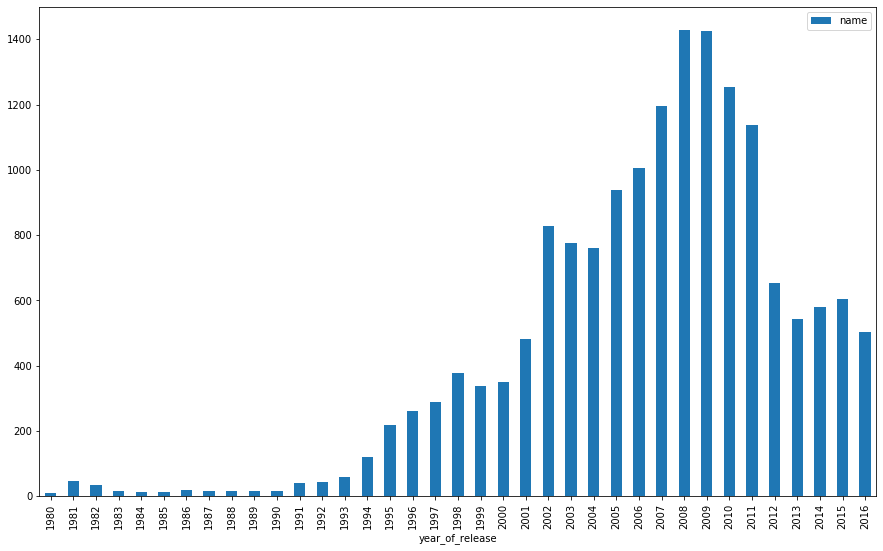

In [357]:
games_per_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_per_years = games_per_years[games_per_years['year_of_release'] !=0]
games_per_years.plot(x='year_of_release', kind='bar', figsize=(15,9))

More or less active releasing of the games began in 1995, until 2008 there has been a steady increase in the number of games released. The peak was in 2008-2009. In 2012, we are seeing a fairly sharp decline in the number of games. Until 1995, the number of games was extremely small, they did not have ratings, this data does not affect our analysis in any way, it can be cut off.

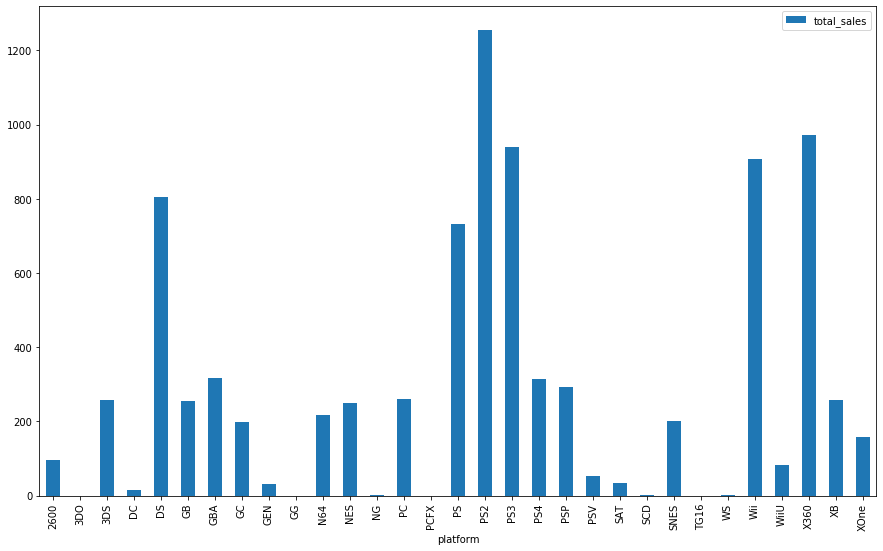

In [358]:
sales_per_platform = data.pivot_table(index='platform', values='total_sales', aggfunc=sum).reset_index()
sales_per_platform.plot(x='platform', kind='bar', figsize=(15,9))

The graph shows that six platforms had the largest sales.

In [359]:
sales_per_platform.nlargest(6,['total_sales'])

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86


In [360]:
top_platforms=data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')
top_platforms=top_platforms[top_platforms['year_of_release'] != 0]
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [361]:
top = top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
top

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,0.00,0.00,0.00,0.00,0.00
1994,0.00,6.03,0.00,0.00,0.00,0.00
1995,0.00,35.96,0.00,0.00,0.00,0.00
1996,0.00,94.70,0.00,0.00,0.00,0.00
1997,0.00,136.17,0.00,0.00,0.00,0.00
1998,0.00,169.49,0.00,0.00,0.00,0.00
1999,0.00,144.53,0.00,0.00,0.00,0.00
2000,0.00,96.37,39.17,0.00,0.00,0.00
2001,0.00,35.59,166.43,0.00,0.00,0.00


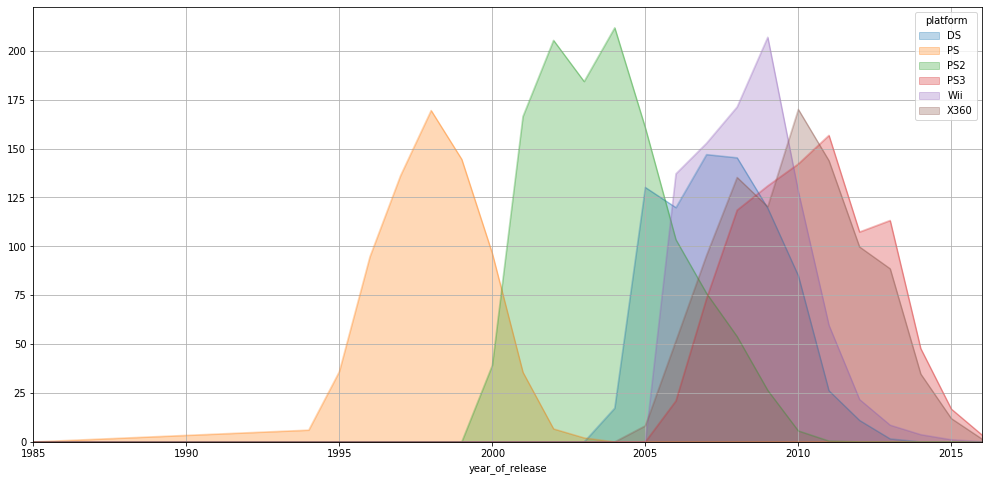

In [362]:
top.plot(kind='area', stacked=False, alpha=0.3, grid=True, figsize=(17,8))

- As we can see from the graph, the oldest PS platform on this list lasted the longest. For almost 10 years, sales of games have been very small, this can be explained by the small number of released games in general, in addition, this entertainment has not yet been as accessible and popular as it is now.
- Otherwise, we see that the platforms' lifespan is on average 10 years. This is also due to the fact that companies release new versions of platforms, and the previous ones go out of sales. So we see how PS, PS2 and PS3 replaced each other, which by 2015 had already lost its popularity too.
- Most likely the next version of PS4 for 2015-2016 has the best performance, although its predecessors bypassed it in the overall ranking in terms of sales.
- For further analysis, I will leave the data for the previous 10 years.

In [363]:
data = data[data['year_of_release'] > 2006]
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2012     653
2015     606
2014     581
2013     544
2016     502
Name: year_of_release, dtype: int64

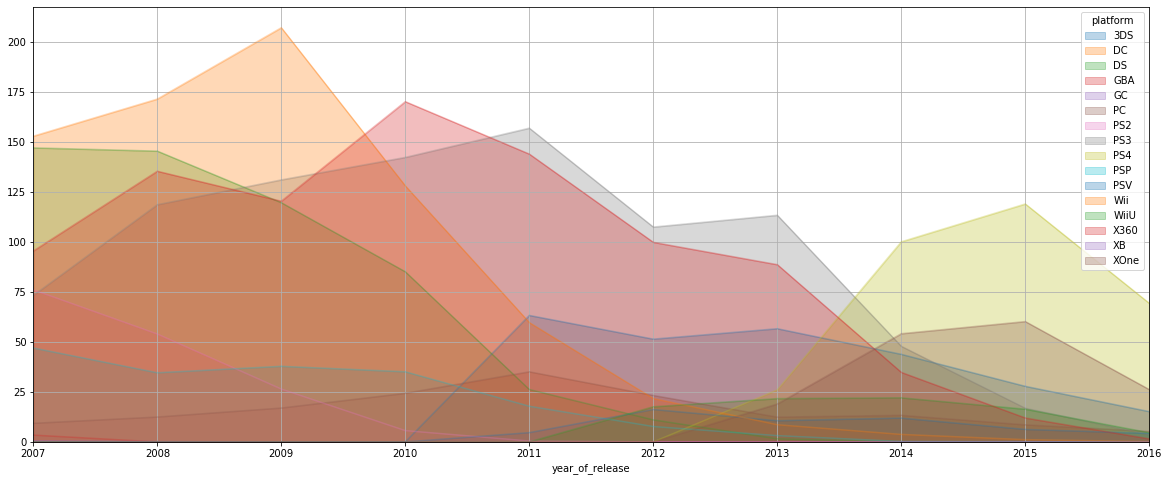

In [364]:
(data
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
 .plot(kind='area', stacked=False, alpha=0.3, grid=True, figsize=(20,8)))


Despite the fact that the biggest sales were from WII and PS2, by 2016 these platforms had already lost its relevance. The most promising in terms of sales are the PS4 and XOne, although their sales are down compared to 2015. In general, new platforms have smoother growth, no peaks.

In [365]:
sales_per_years = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


In [366]:
ordered = sales_per_years.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0       DC
1       GC
2       XB
3      GBA
4      PSV
5     WiiU
6     XOne
7       PC
8      PS2
9      PSP
10     3DS
11     PS4
12      DS
13     Wii
14    X360
15     PS3
Name: platform, dtype: object

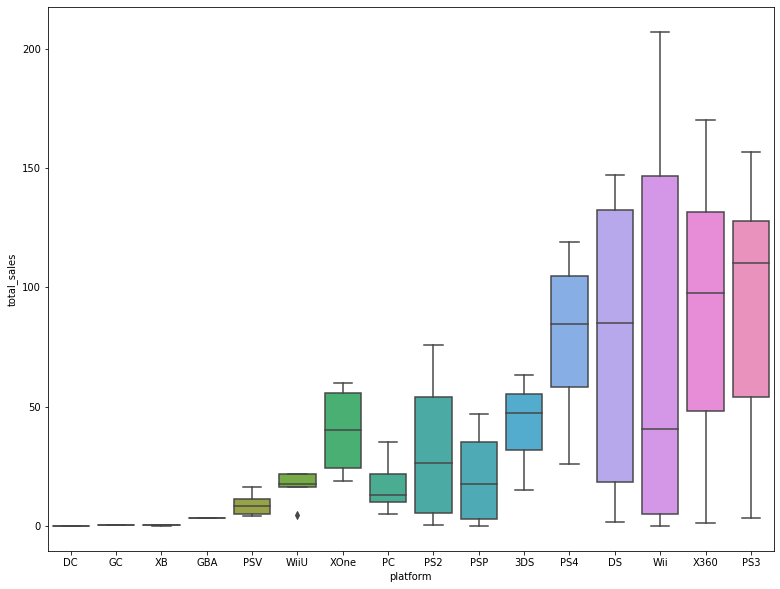

In [367]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=sales_per_years, order=ordered)

- If we look at the data from 2007, WII will be the sales leader, with a fairly high average.
- If we consider XOne and PS4, then PS4 has a much higher level of sales, although it cannot be compared with the level of leaders of previous years. This can be explained by the fact that since 2010 the number of games released in the market as a whole has decreased, as well as by the fact that these platforms have been on the market for only 4 years.

On one platform as an example, let's see if the user's and critic's scores affect sales. Let's consider PS3 platform. Since there is a lot of missing data in these columns, I will use only available data for analysis.

In [368]:
data.dropna(subset=['user_score'], inplace=True)
data.dropna(subset=['critic_score'], inplace=True)
data.isnull().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score          0
rating             63
total_sales         0
dtype: int64

In [369]:
data_ps3 = data.query('platform == "PS3"')
data_ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


Since the number of games with a particular rating may differ, it will be more indicative to assess the influence of the rating by the average value.

In [370]:
ps3_users = data_ps3.groupby('user_score')['total_sales'].mean().reset_index()
ps3_users

,user_score,total_sales
0,0.5,0.140000
1,1.0,0.040000
2,1.7,0.190000
3,1.8,0.130000
4,2.1,0.590000
...,...,...
65,8.7,1.798182
66,8.8,2.570000
67,8.9,3.025000
68,9.0,0.410000


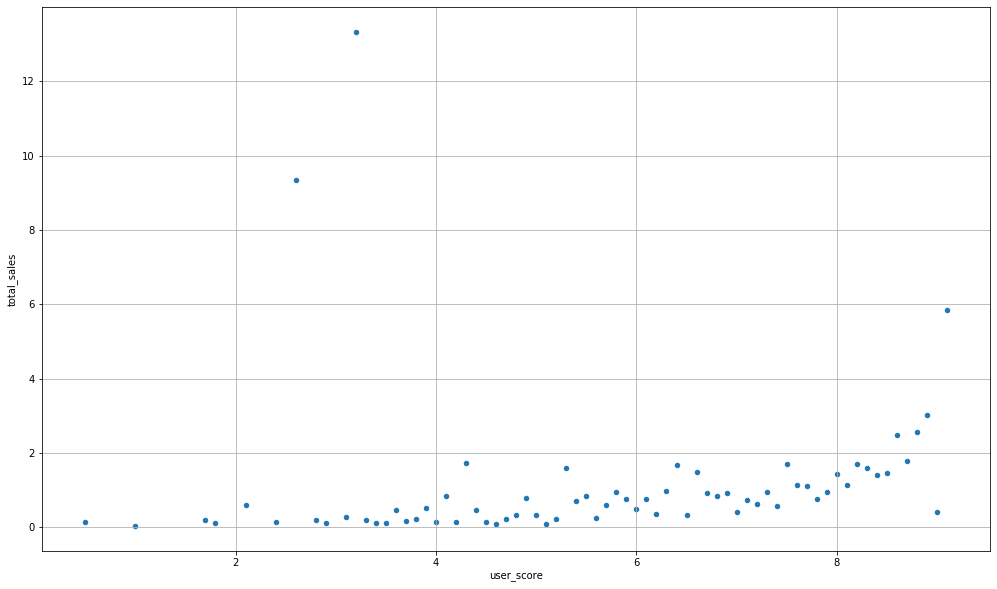

In [371]:
ps3_users.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(17,10))

In [372]:
ps3_users['user_score'].corr(ps3_users['total_sales'])

0.0915711138322984

In [373]:
ps3_critic = data_ps3.groupby('critic_score')['total_sales'].mean().reset_index()
ps3_critic

,critic_score,total_sales
0,13.0,0.040000
1,17.0,0.100000
2,27.0,0.130000
3,30.0,0.050000
4,31.0,0.170000
...,...,...
64,94.0,4.572857
65,95.0,4.962500
66,96.0,6.070000
67,97.0,21.050000


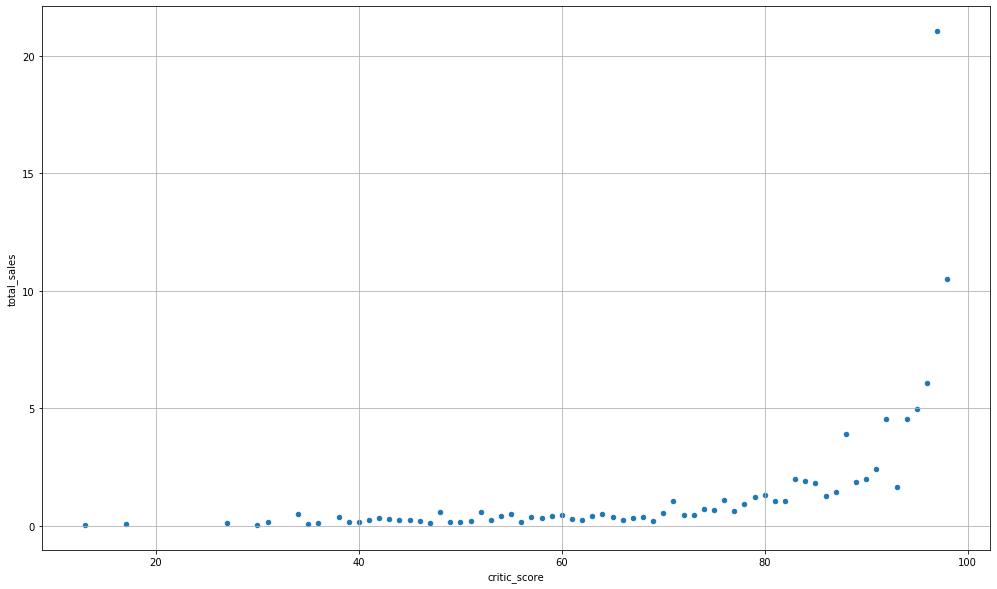

In [374]:
ps3_critic.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(17,10))

In [375]:
ps3_critic['critic_score'].corr(ps3_critic['total_sales'])

0.5208854981768655

Focusing on graphs and correlation, we can say that player ratings do not affect game sales, at the same time, critic's scores have some influence: games with the highest professional ratings are selling better.

Let's compare the results with other platforms.

In [376]:
data_others = data.query('platform != "PS3"')
data_others.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


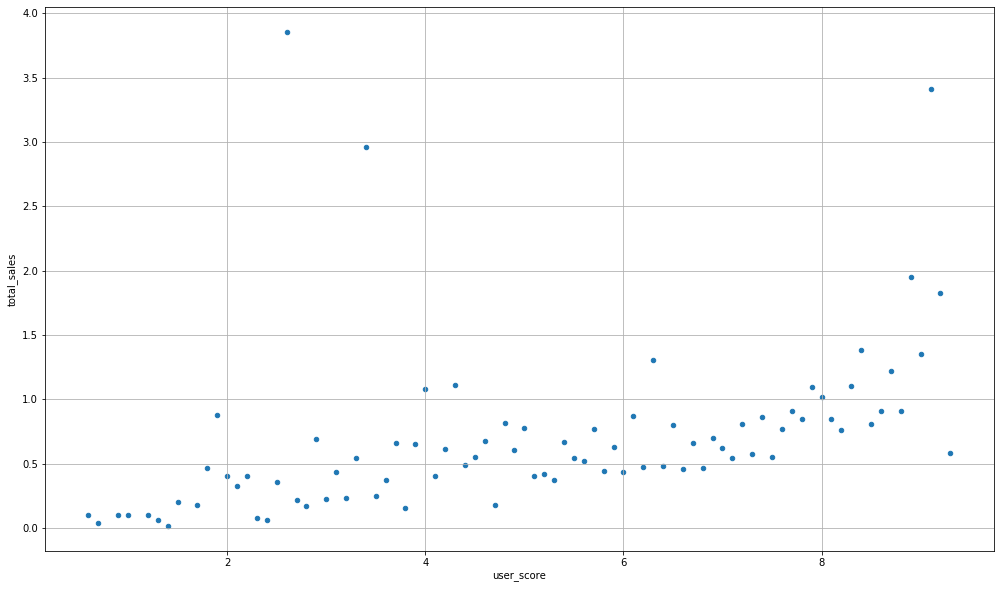

In [377]:
other_users = data_others.groupby('user_score')['total_sales'].mean().reset_index()
other_users.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(17,10))

In [378]:
other_users['user_score'].corr(other_users['total_sales'])

0.41433947921116354

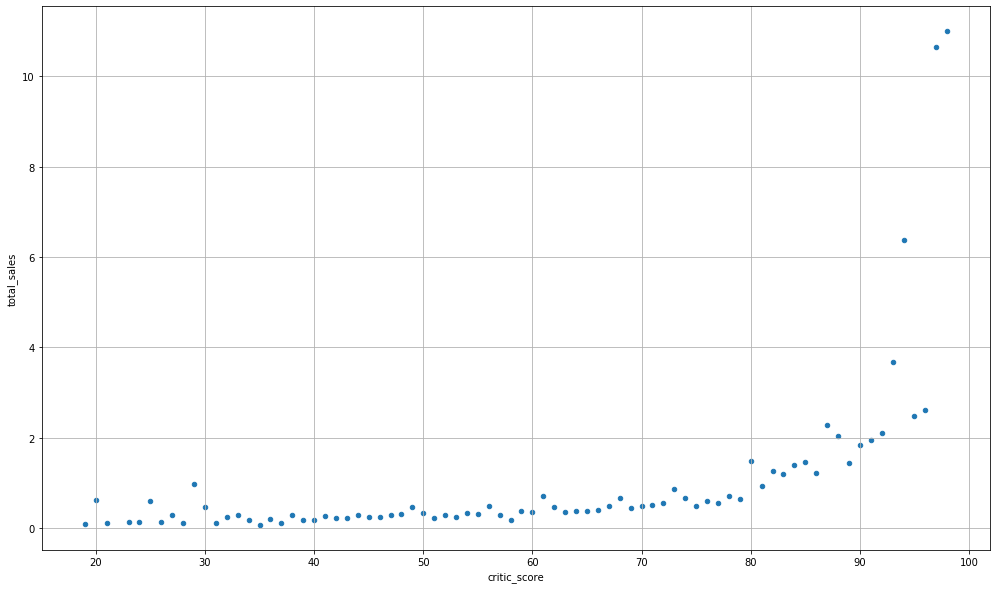

In [379]:
other_critic = data_others.groupby('critic_score')['total_sales'].mean().reset_index()
other_critic.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(17,10))

In [380]:
other_critic['critic_score'].corr(other_critic['total_sales'])

0.5566614307434877

For the rest of the platforms, the same trend is observed in relation to professional ratings, while player ratings have a slightly higher correlation with sales.

Now let's see which genres are more popular.

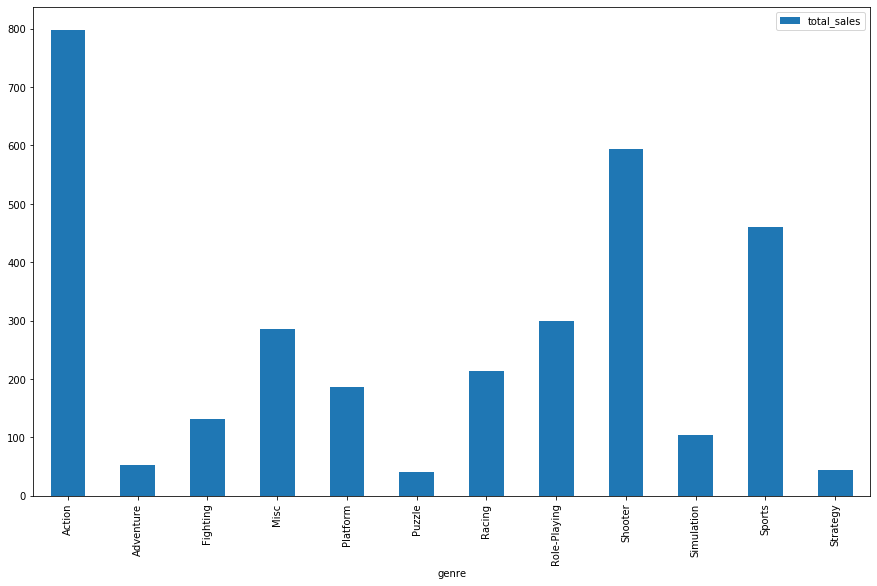

In [381]:
data_genres = data.groupby('genre')['total_sales'].sum().reset_index()
data_genres.plot(x='genre', kind='bar', figsize=(15,9))

The best selling games belong to the genres of action, sports, shooter. You may notice that dynamic genres are more popular than calm logic games.

### Conclusion

- More or less actively release of the games began in 1995, the heyday of the industry fell on 2008-2009. In 2012, we are seeing a fairly sharp decline in the number of games.
- The platform lifetime is on average 10 years. This can be explained by the fact that successful companies release new versions of platforms, and the previous ones go out of sales.
- Modern PS4 and XOne cannot be compared with the level of the leaders of previous years in terms of sales revenues. This can be explained by the fact that since 2010 the number of games released in the market as a whole has decreased, as well as by the fact that these platforms have been on the market for only 4 years.
- The ratings of the players do not particularly affect the sales of games. At the same time, critic's scores have some influence: games with the highest professional ratings are selling better.
- The best-selling games belong to the genres of action, sports, shooter. You may notice that dynamic genres are more popular than calm logic games.

### Step4

Let's look at the popularity of platforms and genres by sales region.

In [382]:
data_na = data.groupby('platform')['na_sales'].sum().reset_index()
data_na['percent_na'] = data_na['na_sales']/data_na['na_sales'].sum()
data_na = data_na.nlargest(5,['percent_na'])
data_na

,platform,na_sales,percent_na
11,X360,493.48,0.315220
5,PS3,333.41,0.212972
9,Wii,273.74,0.174857
1,DS,104.85,0.066975
6,PS4,84.46,0.053950


In [383]:
data_eu = data.groupby('platform')['eu_sales'].sum().reset_index()
data_eu['percent_eu'] = data_eu['eu_sales']/data_eu['eu_sales'].sum()
data_eu = data_eu.nlargest(5,['percent_eu'])
data_eu

,platform,eu_sales,percent_eu
5,PS3,267.15,0.256655
11,X360,224.28,0.215469
9,Wii,160.55,0.154243
6,PS4,112.44,0.108023
3,PC,85.87,0.082497


In [384]:
data_jp = data.groupby('platform')['jp_sales'].sum().reset_index()
data_jp['percent_jp'] = data_jp['jp_sales']/data_jp['jp_sales'].sum()
data_jp = data_jp.nlargest(5,['percent_jp'])
data_jp

,platform,jp_sales,percent_jp
5,PS3,53.91,0.231771
9,Wii,43.75,0.188091
1,DS,40.28,0.173173
0,3DS,33.87,0.145615
7,PSP,20.56,0.088392


In [385]:
data_frames = [data_na, data_eu, data_jp]
data_merged = reduce(lambda left,right: pd.merge(left,right,on=['platform'], how='outer'), data_frames).fillna(0)
data_merged = data_merged[['platform', 'percent_na', 'percent_eu', 'percent_jp']]
data_merged

,platform,percent_na,percent_eu,percent_jp
0,X360,0.315220,0.215469,0.000000
1,PS3,0.212972,0.256655,0.231771
2,Wii,0.174857,0.154243,0.188091
3,DS,0.066975,0.000000,0.173173
4,PS4,0.053950,0.108023,0.000000
5,PC,0.000000,0.082497,0.000000
6,3DS,0.000000,0.000000,0.145615
7,PSP,0.000000,0.000000,0.088392


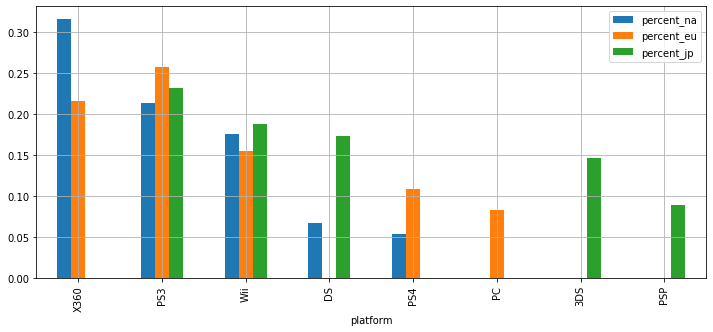

In [386]:
data_merged.plot(x='platform', grid=True, kind='bar', figsize=(12, 5))

As we can see, the popularity of the platforms varies greatly from region to region. Only two platforms are found in all three regions, and are quite popular everywhere: PS3 and WII. In America, the X360 platform is selling the best, in Europe and Japan the leader is PS3.

Let's see what genres are popular in different regions.

In [387]:
genres_na = data.groupby('genre')['na_sales'].sum().reset_index().nlargest(5,['na_sales'])
genres_na

,genre,na_sales
0,Action,379.43
8,Shooter,309.15
10,Sports,233.62
3,Misc,160.04
7,Role-Playing,131.96


In [388]:
genres_eu = data.groupby('genre')['eu_sales'].sum().reset_index().nlargest(5,['eu_sales'])
genres_eu

,genre,eu_sales
0,Action,271.85
8,Shooter,201.02
10,Sports,149.19
6,Racing,86.88
3,Misc,79.87


In [389]:
genres_jp = data.groupby('genre')['jp_sales'].sum().reset_index().nlargest(5,['jp_sales'])
genres_jp

,genre,jp_sales
7,Role-Playing,65.32
0,Action,45.15
4,Platform,22.60
10,Sports,19.48
3,Misc,16.92


In [390]:
data_frames1 = [genres_na, genres_eu, genres_jp]
genres_merged = reduce(lambda left,right: pd.merge(left,right,on=['genre'], how='outer'), data_frames1).fillna(0)
genres_merged

,genre,na_sales,eu_sales,jp_sales
0,Action,379.43,271.85,45.15
1,Shooter,309.15,201.02,0.00
2,Sports,233.62,149.19,19.48
3,Misc,160.04,79.87,16.92
4,Role-Playing,131.96,0.00,65.32
5,Racing,0.00,86.88,0.00
6,Platform,0.00,0.00,22.60


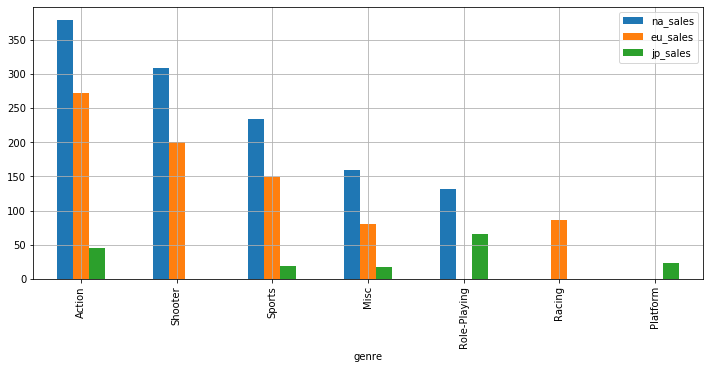

In [391]:
genres_merged.plot(x='genre', grid=True, kind='bar', figsize=(12, 5))

In the case of genres, America and Europe are more unanimous in their preferences: they coincide in four genres out of five, and the distribution in terms of popularity is also the same. The most popular genre for these two regions is action. In turn, in Japan, the most popular genre is Role-playing.

Let's see if the ESRB rating affects sales by region. I will delete the remaining missing values in the rating column.

In [392]:
data.dropna(subset=['rating'], inplace=True)
data['rating'].unique()

array(['E', 'M', 'T', 'E10+', 'RP'], dtype=object)

In [393]:
esrb_na = data.groupby('rating')['na_sales'].sum().sort_values().reset_index()
esrb_na

,rating,na_sales
0,RP,0.00
1,E10+,235.15
2,T,333.62
3,E,465.11
4,M,530.20


In [394]:
esrb_eu = data.groupby('rating')['eu_sales'].sum().sort_values().reset_index()
esrb_eu

,rating,eu_sales
0,RP,0.03
1,E10+,138.34
2,T,202.74
3,E,321.07
4,M,374.07


In [395]:
esrb_jp = data.groupby('rating')['jp_sales'].sum().sort_values().reset_index()
esrb_jp

,rating,jp_sales
0,RP,0.00
1,E10+,30.68
2,M,39.79
3,T,69.31
4,E,91.93


In [396]:
data_frames2 = [esrb_na, esrb_eu, esrb_jp]
esrb_merged = reduce(lambda left,right: pd.merge(left,right,on=['rating'], how='outer'), data_frames2).fillna(0)
esrb_merged

,rating,na_sales,eu_sales,jp_sales
0,RP,0.00,0.03,0.00
1,E10+,235.15,138.34,30.68
2,T,333.62,202.74,69.31
3,E,465.11,321.07,91.93
4,M,530.20,374.07,39.79


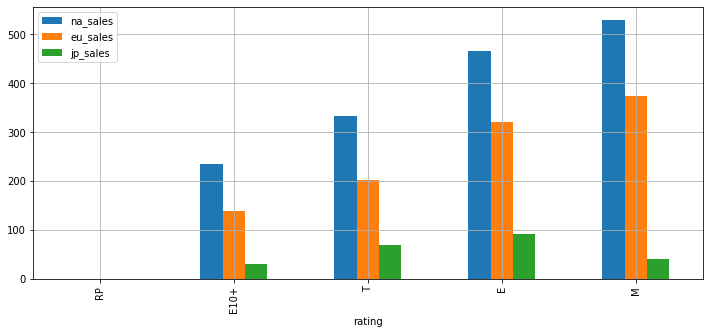

In [397]:
esrb_merged.plot(x='rating', grid=True, kind='bar', figsize=(12, 5))

In [398]:
rp = data.query('rating == "RP"').groupby('year_of_release')['name'].count()
rp

year_of_release
2011    1
Name: name, dtype: int64

The RP rating (rating pending) refers to just one game that appears to have had small sales in Europe.
For the rest of the ratings, as well as for genres, America and Europe are unanimous, here the M rating (games intended for adults) is in the lead, as for Japan - the E rating is popular there (games for all age groups).

### Conclusion

Based on the results obtained, we learned:
- The popularity of platforms varies greatly from region to region. Only two platforms are found in all three regions. In America, the X360 platform is the bestseller, in Europe and Japan the leader is PS3.
- America and Europe choose the same genres. The most popular genre for these two regions is action. In turn, in Japan, the most popular genre is Role-playing.
- Regarding the ESRB ratings, as well as by genre, America and Europe are unanimous, the M rating (games intended for adults) is in the lead here, as for Japan - the E rating is popular there (games for all age groups).

### Step5

We have two theories:
—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.

Let's test them. 

Let's formulate null hypothesis H₀ and alternative hypothesis, H₁.
H₀: Average user ratings of the Xbox One and PC platforms are equal.
H₁: Average user ratings of the Xbox One and PC platforms differs

Let's test the hypothesis.
Let's first apply Levene's test to check if variances differ significantly.

In [399]:
from scipy import stats as st
from scipy.stats import levene

xone_user_score = data.query('platform == "XOne"').groupby('name')['user_score'].mean()
pc_user_score = data.query('platform == "PC"').groupby('name')['user_score'].mean()

stat, p = levene(xone_user_score, pc_user_score)
p

0.09034420362014543

A very small p value means that equal_var = False will need to be used.

In [400]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 0.047057981517302505
We reject the null hypothesis


Let's formulate null hypothesis H₀ and alternative hypothesis, H₁ for the second hypothesis
H₀: Average user ratings for the Action and Sports genres are equal.
H₁: Average user ratings for the Action and Sports genres are different

In [401]:
action = data.query('genre == "Action"').groupby('name')['user_score'].mean()
sports = data.query('genre == "Sports"').groupby('name')['user_score'].mean()

stat, p = levene(action, sports)
p

0.025062496424152043

In [402]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 9.542086567842886e-06
We reject the null hypothesis


### Conclusion

Hypothesis testing has shown that we cannot reject both of our hypotheses: the average user ratings of the Xbox One and PC platforms are the same and average user ratings for the Action and Sports genres are different

<a id="oc"></a>

### Overall conclusion

Based on the results of the data analysis, we have traced some patterns and can give the following recommendations:

- Pay attention to the PS4 platform, as well as XOne, as promising in terms of sales.

- Despite the fact that the ratings of players and professionals do not have a strong correlation with game sales, I would recommend filling in this information if it is not available on the site, because some users may still be guided by ratings when making a decision.
- On average, the most popular genres are: action, sports, shooter. But, if this is undoubtedly relevant for America and Europe, then in Japan they prefer Role-playing. This should be taken into account when planning campaigns in different regions.
- The popularity of platforms varies greatly from region to region, which is also worth paying attention to.
- In terms of ESRB ratings, in America and Europe, the M (games for adults) is leading, in Japan - E (games for all age groups).